In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [17]:
data = pd.read_csv("/content/IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
X, y = make_regression(n_samples=150, n_features=20, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy', metrics=['mse'])

In [26]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=1000, batch_size=32)

Epoch 1/1000
4/4 [==============================] - 0s 26ms/step - loss: 2.1566e-06 - mse: 32898.3281 - val_loss: 3.7049e-06 - val_mse: 36228.1953
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.1566e-06 - mse: 32898.3281 - val_loss: 3.7049e-06 - val_mse: 36228.1953
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.1566e-06 - mse: 32898.3281 - val_loss: 3.7049e-06 - val_mse: 36228.1953
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.1566e-06 - mse: 32898.3281 - val_loss: 3.7049e-06 - val_mse: 36228.1953
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.1566e-06 - mse: 32898.3281 - val_loss: 3.7049e-06 - val_mse: 36228.1953
Epoch 6/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.1566e-06 - mse: 32898.3281 - val_loss: 3.7049e-06 - val_mse: 36228.1953
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.1566e-06 - mse: 32898.3281 - val_loss: 3.70

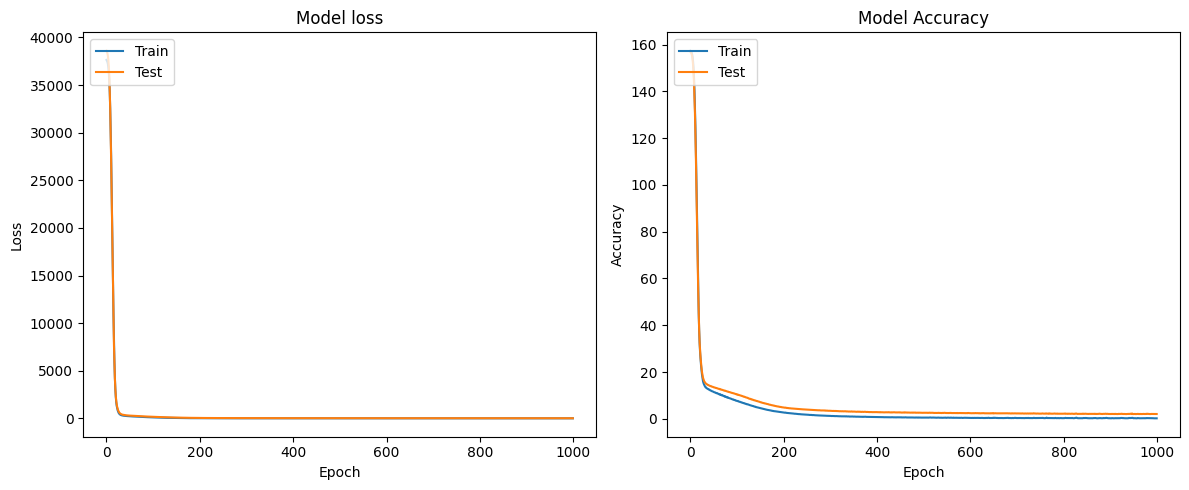

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()